In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data/preprocessed_20221106.csv', index_col = 0)

In [3]:
df

,Survived,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble
0,0,3,1,0,1,2,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,4,4,5,1,0,0,0,0,1,0,0
2,1,3,0,0,1,3,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,1,4,4,5,0,0,1,0,0,1,0,0
4,0,3,0,0,1,4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,3,2,0,0,0,1,0,0,0,0,1
887,1,1,0,0,1,2,3,6,0,0,1,0,0,0,1,0
888,0,3,1,2,0,2,3,0,0,0,1,0,0,0,1,0
889,1,1,0,0,1,3,3,5,1,0,0,0,1,0,0,0


In [4]:
X, y = df.iloc[:, 1:], df['Survived']

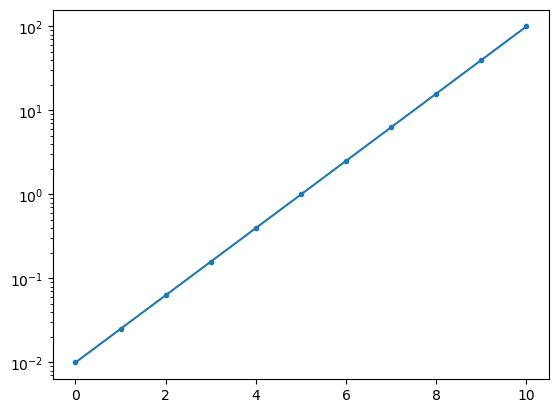

In [5]:
c = np.logspace(-2, 2, num = 11)
plt.plot(c, '.-')
plt.yscale('log')

In [6]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameters = {
    'C': (0.1, 0.5, 1, 5),
    'kernel': ('rbf', 'linear'),
    'gamma': (0.1, 1, 5)
}

clf = SVC()
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X,y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1,

[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...........................C=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': (0.1, 0.5, 1, 5), 'gamma': (0.1, 1, 5),
                         'kernel': ('rbf', 'linear')},
             scoring='f1', verbose=2)

In [9]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037651,0.027817,0.009875,0.008192,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.783784,0.823529,...,0.843750,0.647887,0.788732,0.767123,0.656250,0.612903,0.666667,0.727484,0.078323,19
1,0.015900,0.000808,0.003121,0.006242,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.800000,0.716418,...,0.730159,0.711864,0.769231,0.794118,0.718750,0.816901,0.769231,0.757294,0.036188,15
2,0.027843,0.009634,0.011408,0.007514,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.057143,0.055556,0.000000,0.111111,0.000000,0.055556,0.038463,0.042509,23
3,0.029711,0.010997,0.009672,0.006927,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.800000,0.716418,...,0.730159,0.711864,0.769231,0.794118,0.718750,0.816901,0.769231,0.757294,0.036188,15
4,0.038190,0.007189,0.010938,0.007160,0.1,5,rbf,"{'C': 0.1, 'gamma': 5, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24
5,0.015203,0.006197,0.003525,0.006165,0.1,5,linear,"{'C': 0.1, 'gamma': 5, 'kernel': 'linear'}",0.800000,0.716418,...,0.730159,0.711864,0.769231,0.794118,0.718750,0.816901,0.769231,0.757294,0.036188,15
6,0.029931,0.003062,0.000801,0.002402,0.5,0.1,rbf,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}",0.828571,0.764706,...,0.787879,0.730159,0.769231,0.816901,0.750000,0.789474,0.757576,0.773422,0.030494,2
7,0.023972,0.010934,0.003426,0.006166,0.5,0.1,linear,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.776119,0.727273,...,0.709677,0.711864,0.781250,0.794118,0.718750,0.816901,0.793651,0.757587,0.037414,9
8,0.045117,0.028905,0.017188,0.014240,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.857143,0.764706,...,0.738462,0.695652,0.764706,0.833333,0.696970,0.794521,0.750000,0.767928,0.049664,3
9,0.040324,0.026871,0.004763,0.008877,0.5,1,linear,"{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}",0.776119,0.727273,...,0.709677,0.711864,0.781250,0.794118,0.718750,0.816901,0.793651,0.757587,0.037414,9


best score is 0.7767064407924817 with params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
